# Anyonic models

We solve the almost-bosonic anyon model of https://arxiv.org/pdf/1901.10739.pdf

Iter     Function value   Gradient norm 
     0     8.239302e+01     1.370281e+01
 * time: 0.003985881805419922
     1     6.273721e+01     1.048062e+01
 * time: 0.012205839157104492
     2     5.742971e+01     1.354350e+01
 * time: 0.03081202507019043
     3     4.134229e+01     8.754480e+00
 * time: 0.05589890480041504
     4     3.118983e+01     7.561031e+00
 * time: 0.14724183082580566
     5     2.448792e+01     5.855145e+00
 * time: 0.16973185539245605
     6     2.343025e+01     6.539001e+00
 * time: 0.18772602081298828
     7     1.310322e+01     3.154204e+00
 * time: 0.20544791221618652
     8     1.056855e+01     4.370415e+00
 * time: 0.22319483757019043
     9     1.027849e+01     5.848624e+00
 * time: 0.24085688591003418
    10     9.245528e+00     3.411545e+00
 * time: 0.29790186882019043
    11     9.198261e+00     6.545255e+00
 * time: 0.31261682510375977
    12     8.591697e+00     4.027765e+00
 * time: 0.3270599842071533
    13     7.563157e+00     3.519892e+00
 * time

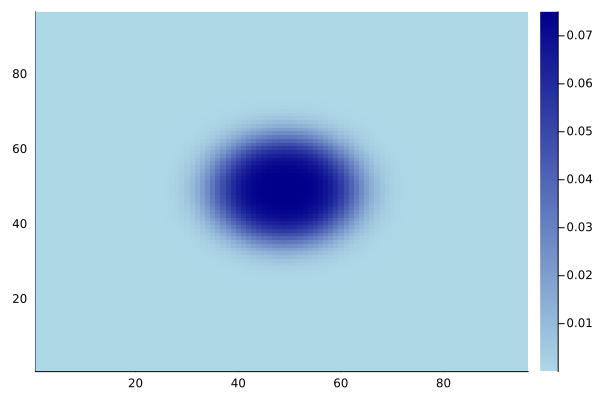

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 14
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2);

# Parameters
Ecut = 50
n_electrons = 1
β = 5;

# Collect all the terms, build and run the model
terms = [Kinetic(; scaling_factor=2),
         ExternalFromReal(X -> pot(X...)),
         Anyonic(1, β)
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-14)  # Reduce tol for production
E = scfres.energies.total
s = 2
E11 = π/2 * (2(s+1)/s)^((s+2)/s) * (s/(s+2))^(2(s+1)/s) * E^((s+2)/s) / β
println("e(1,1) / (2π)= ", E11 / (2π))
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)